## The photonic bath: Harper-Hofstadter model with $\phi=1/q$

In this notebook, we present the codes used in $\texttt{arXiv-ref}$ regarding the photonic bath of our problem: the Harper-Hofstadter model, a two-dimensional tight-binding model describing a particle hopping in a lattice in the presence of an synthetic magnetic field perpendicular to the lattice plane, which is introduced in the form of complex hopping amplitudes, following Peierls substitution. 

$$ \mathcal{H} = \sum_\textbf{r} \omega_aa_\textbf{r}^\dagger a_\textbf{r}-J\sum_{\langle jl \rangle} a_j^\dagger a_l \exp\left(\int_{l}^j \vec{A}\cdot\vec{dl}+\text{H.c.}\right)$$

We will take $\omega_a=0$ as the reference energy of the problem, and assume a Landau gauge choice $\vec{A}(x,y,z)=\left(0, Bx, 0\right)$ describing a uniform magnetic field $\vec{B}=B\vec{e}_z$. With this gauge choice and setting the on-site lattice potentials to zero and $e=\hbar=1$, the Harper-Hofstadter hamiltonian can be written as follows:

\begin{equation}
\mathcal{H}=-J\sum_{x,y} a_{x+1,y}^\dagger a_{x,y} +  a_{x,y+1}^\dagger a_{x,y}e^{-2\pi\phi i x} + \text{H.c.}
\end{equation}

The Peierls phase breaks time-reversal symmetry, acting as an artificial magnetic field. Along our work, we considered values of $\phi$ of the form $1/q$ where $q$ is a natural number.

Let's start by import the required modules

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from use_functions import *

#Plotting
styles = ['science']
prefix = 'stylelib/'
sufix = '.mplstyle'
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 20})
plt.rcParams['axes.linewidth'] = 1 #set the value globally

import warnings
warnings.filterwarnings("ignore")

we will consider the possibility of including periodic boundary conditions in the X direction, in such a way that the hamiltonian commutes with traslation operators along X and thus can be diagonalized in a basis of well-defined quasi-momentum $k_x$. In such case, the eigenstates factorize as $\psi(x,y)=e^{ik_yy}\Phi(x)$. Letting $a$ to be the lattice spacing, we the quantities $(m,n)=(x/a,y/a)$ (since lattice coordinates are integers), $\nu=k_y a$. Then, inserting this form of $\psi(x,y)$ into the time-independent Schrödinger equation $\langle x,y|\Psi_{\beta,k_y}\rangle=e^{ik_y y}\psi_{\beta,k_y}(x)$, we obtain the celebrated Harper equation:

$$ \psi_{\beta,k_y}(x+1)+\psi_{\beta,k_y}(x-1)+2\cos\left(2\pi\phi x - k_y\right)= E_\beta(k_y)\psi_{\beta,k_y}(x)$$

Written as $\textbf{A}\vec{\Psi}=\vec{\Psi}$, diagonalizing the matrix $\textbf{A}$ yields the Harper-Hofstadter spectrum.

Text(0, 0.5, '$\\phi$')

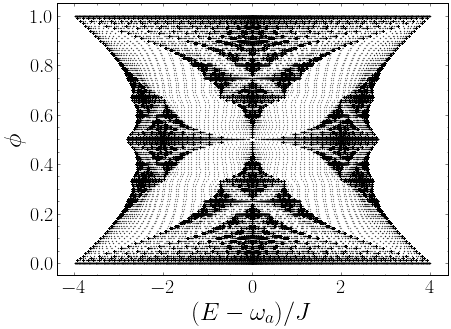

In [2]:
# Set parameters:

Lx = 150                            # Lattice size along X
fluxes = np.arange(101)/100        # Values of magnetic flux to probe
nus = np.linspace(0,2*np.pi, 50)   # Discretized momentum along Y


# Diagonzalize the Harper matrix for the selected set of parameters

y_vals = np.zeros(q)
x_vals = np.zeros(q)

fig, ax = plt.subplots(figsize=(7,5))

for flux in fluxes:
    y_vals[:] = flux
    for nu in nus:  
        x_vals=np.linalg.eigvalsh(Harper_matrix(flux,nu, Lx))  # Diagonalize
        ax.plot(x_vals,y_vals,'ko',markersize=0.2)            # Plot 

ax.set_xlabel('$(E-\omega_a)/J$', fontsize=25)
ax.set_ylabel('$\phi$', fontsize=25)

From the Harper matrix we can obtain the spectrum of the Harper-Hofstader model with $\phi=1/q$. The spectrum consists of a series of flat bands, corresponding to delocalized states.

In [3]:
def localization_color(vector):
    weight = np.linspace(-1, 1, len(vector))
    return np.sum(weight*vector**2)

(-1.0, 1.0)

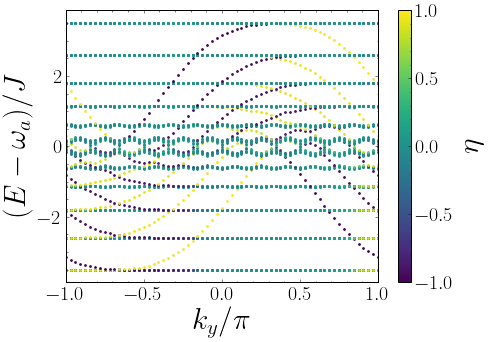

In [4]:
# Set parameters
Lx = 65
q = 12
ks = np.linspace(-np.pi, np.pi, 65)

fig, ax = plt.subplots(figsize=(7,5))
cm = plt.cm.get_cmap('viridis')

for k in ks:
    
    eigvals, eigvecs = np.linalg.eigh(Harper_matrix(1/q, k, Lx))
   
    for i, (eigval, eigvec) in enumerate(zip(eigvals, eigvecs)):
        im = ax.scatter(k/np.pi, eigval, s=3, 
                   c=localization_color(eigvecs[:,i]), 
                   vmin = -1, vmax = 1, cmap=cm)
        
a = fig.colorbar(im, ax=ax)   
a.set_label('$\eta$', fontsize=30)
ax.set_xlabel('$k_y/\pi$', fontsize=30)
ax.set_ylabel('$(E-\omega_a)/J$', fontsize=30)
ax.set_xlim([-1,1])

We can observe from the color code that gapless states are localized either on the left or right boundaries of the lattice. A fundamental feature of these topological boundary modes is that they arise only when the lattice indeed has boundaries: they dissapear when the lattice has toroidal topology.

(-4.2, 0.5)

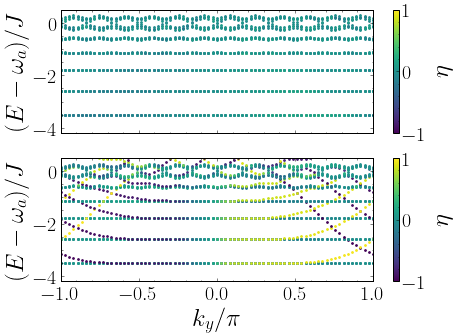

In [5]:
# Set parameters
Lx = 12*4
q = 12
ks = np.linspace(-np.pi, np.pi, 75)

fig, axes = plt.subplots(nrows=2, figsize=(7,5), sharex=True)
cm = plt.cm.get_cmap('viridis')

for k in ks:
    
    eigvals_OBC, eigvecs_OBC = np.linalg.eigh(Harper_matrix(1/q, k, Lx, PBC_X=False))
    eigvals_PBC, eigvecs_PBC = np.linalg.eigh(Harper_matrix(1/q, k, Lx, PBC_X=True))
   
    for i in range(len(eigvals_OBC)):
        im = axes[1].scatter(k/np.pi, eigvals_OBC[i], s=3, 
                             c=localization_color(eigvecs_OBC[:,i]), 
                             vmin = -1, vmax = 1, cmap=cm)
        im = axes[0].scatter(k/np.pi, eigvals_PBC[i], s=3, 
                             c=localization_color(eigvecs_PBC[:,i]), 
                             vmin = -1, vmax = 1, cmap=cm)
        
a = fig.colorbar(im, ax=axes[0])   
a.set_label('$\eta$', fontsize=25)
a = fig.colorbar(im, ax=axes[1])   
a.set_label('$\eta$', fontsize=25)
axes[1].set_xlabel('$k_y/\pi$', fontsize=25)
axes[0].set_ylabel('$(E-\omega_a)/J$', fontsize=25)
axes[1].set_ylabel('$(E-\omega_a)/J$', fontsize=25)
axes[0].set_xlim([-1,1])
axes[0].set_ylim([-4.2, 0.5])
axes[1].set_ylim([-4.2, 0.5])

The presence of edge modes manifests in the density of states of the bath. Recall that the density of states (DoS) can be computed from the spectrum $\left\lbrace E_B\right\rbrace$ of the bath Hamiltonian as:

$$ \text{DoS}(E) = \sum_{E_B}\delta(E-E_B) $$

We perform the numerical calculation of this quantity by performing first an exact diagonalization of the Harper-Hofstatder Hamiltonian. Then, we define an auxiliary function that acts as a 'smoothed' Dirac delta function with finite width $\theta$, so that the DoS can be well approximated by
\begin{equation}
\text{DoS}(E) \approx \sum_{E_B} f_\theta(E-E_B)
\end{equation}
In our work, we took $f_\theta(E-E_B)$ as a normal distrubution:
\begin{equation}
f_\theta(E-E_B)=\frac{1}{\sqrt{2\pi\theta^2}}\exp\left(\frac{(E-E_B)^2}{2\theta^2}\right)\;.
\label{eqSM:normal_function}
\end{equation}

We implement such computation in a function $\texttt{get-DoS}$ that can be found in the $\texttt{use-functions.py}$ module.

Text(0.5, 1.0, 'Cylindrical topology')

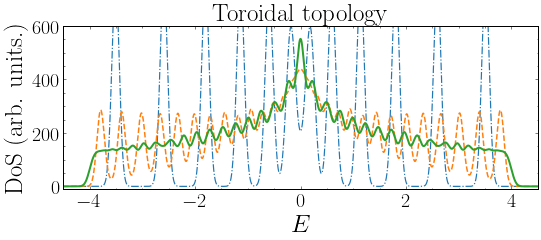

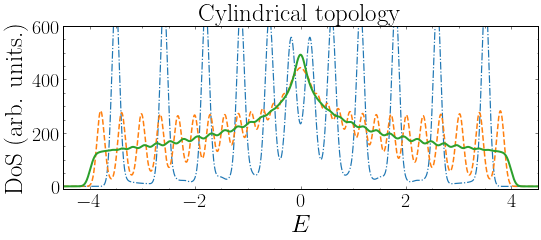

In [21]:
# The case of toroidal topology (periodic boundary conditions in both directions)

fluxes = [1/12, 1/30, 0]
args = [0.1]
linestyles = ['dashdot', 'dashed', 'solid']
labels = ['$\phi=1/15$', '$\phi=1/30$', '$\phi=0$']
linewidths = [1.2, 1.5, 2]

fig, ax = plt.subplots(figsize=(8.5,3))

for (i, flux) in enumerate(fluxes):
    
    H = HarperHofstadter(48, flux=flux, PBC=True, PBC_X=True).hamiltonian().todense()
    eigenvals, eigenvecs = np.linalg.eigh(H)
    
    energy_vector, DoS = get_DoS(eigenvals, function = normal, args=args, n=len(eigenvals))
    ax.plot(energy_vector, DoS, linestyle=linestyles[i], label=labels[i], linewidth=linewidths[i])
    
ax.set_xlabel('$E$', fontsize=25)
ax.set_ylabel('DoS (arb. units.)', fontsize=25)
ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-10, 600])
ax.set_title('Toroidal topology', fontsize=25)

# The case of cylindrical topology (periodic boundary conditions in Y direction, open in X)

fluxes = [1/12, 1/30, 0]
args = [0.1]
linestyles = ['dashdot', 'dashed', 'solid']
labels = ['$\phi=1/15$', '$\phi=1/30$', '$\phi=0$']
linewidths = [1.2, 1.5, 2]

fig, ax = plt.subplots(figsize=(8.5,3))

for (i, flux) in enumerate(fluxes):
    
    H = HarperHofstadter(48, flux=flux, PBC=True).hamiltonian().todense()
    eigenvals, eigenvecs = np.linalg.eigh(H)
    
    energy_vector, DoS = get_DoS(eigenvals, function = normal, args=args, n=len(eigenvals))
    ax.plot(energy_vector, DoS, linestyle=linestyles[i], label=labels[i], linewidth=linewidths[i])
    
ax.set_xlabel('$E$', fontsize=25)
ax.set_ylabel('DoS (arb. units.)', fontsize=25)
ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-10, 600])
ax.set_title('Cylindrical topology', fontsize=25)

Decreasing the flux, we observe the tendency of the DoS towards the one of a standard square lattice, that displays a van Hove singularity in the middle of the band. In order to get a grasp of the density of states localized at the system boundary, we can adapt the definition of DoS to account for local features: the local density of states (LDoS) is defined as

$$ \text{LDoS}(\textbf{r}, E) = \sum_\text{E_B} |\langle \textbf{r}|E_B\rangle|^2 \cdot \delta(E-E_B) $$

This quantity is computed similarly as the DoS, and is implemented in the function $\texttt{get-LDoS}$ in the module $\texttt{use-functions.py}$

(0.0, 0.18)

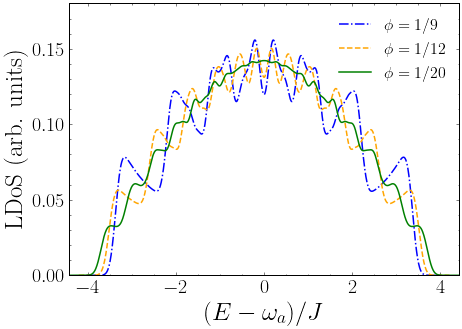

In [19]:
# Diagonzalize the Harper matrix for the selected set of parameters
Lx = 100
ks = np.linspace(-np.pi, np.pi, 151)
qs = [9, 12, 20]
colors = ['blue', 'orange', 'green']
alpha = 0.2
linestyles = ['dashdot', 'dashed', 'solid']

fig, ax = plt.subplots(figsize=(7,5))

for (i, q) in enumerate(qs):
    energy, eigenvectors = np.linalg.eigh(HarperHofstadter(50, flux=1/q, PBC=True).hamiltonian().todense())
    energy_vector, LDoS_edge = get_LDoS(energy, eigenvectors, pos = 0, function=normal_LDoS, args=[0.15], n=1000)
    ax.plot(energy_vector,LDoS_edge, linewidth=1.5, color=colors[i], label='$\phi=1/$'+str(q),
            linestyle=linestyles[i])

ax.legend(fontsize=16, loc='best')
ax.set_xlabel('$(E-\omega_a)/J$', fontsize=25)
ax.set_ylabel('LDoS (arb. units)', fontsize=25)
ax.set_xlim(energy_vector[0], energy_vector[-1])
ax.set_ylim(0, 0.18)

Along our work, we dealt with emitters coupled to the boundary of a Harper-Hofstadter lattice. 

Text(0, 0.5, '$(E-\\omega_a)/J$')

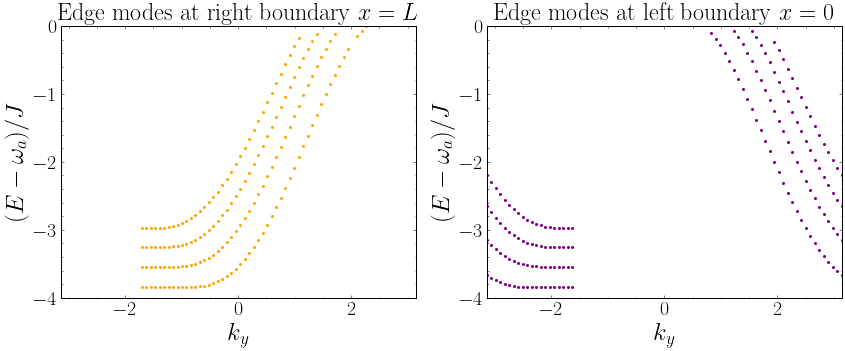

In [11]:
# Set magnetic flux and number of edge modes to plot
q, num_edge = 40, 4
threshold = 0.8


edge_modes = get_edge_dispersion(q, num_edge, threshold=threshold, N=80)

fig, axes = plt.subplots(ncols=2, figsize=(14,5))
[axes[0].plot(edge_modes[str(n)][0], edge_modes[str(n)][1], 
         'o', markersize=2, color='orange') for n in range(num_edge)]
axes[0].set_xlim([-np.pi, np.pi])
axes[0].set_ylim([-4,0])
axes[0].set_title('Edge modes at right boundary $x=L$')

edge_modes = get_edge_dispersion(q, num_edge, threshold=threshold, N=80, side=-1)

[axes[1].plot(edge_modes[str(n)][0], edge_modes[str(n)][1], 
         'o', markersize=2, color='purple') for n in range(num_edge)]
axes[1].set_xlim([-np.pi, np.pi])
axes[1].set_ylim([-4,0])
axes[1].set_title('Edge modes at left boundary $x=0$')

# Add labels
axes[0].set_xlabel('$k_y$', fontsize=25)
axes[0].set_ylabel('$(E-\omega_a)/J$', fontsize=25)

axes[1].set_xlabel('$k_y$', fontsize=25)
axes[1].set_ylabel('$(E-\omega_a)/J$', fontsize=25)